In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from matplotlib import rcParams
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
%matplotlib inline
rcParams['figure.figsize'] = 7,4

In [20]:
iris=datasets.load_iris() 
X=scale(iris.data)
y=pd.DataFrame(iris.target)
variable_names= iris.feature_names
X[0:10,]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [21]:
clustering =KMeans(n_clusters=3, random_state = 5) 
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

In [22]:
iris_df=pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Fetal_Width'] 
y.columns=['Targets']

Text(0.5, 1.0, 'K-Means Classification')

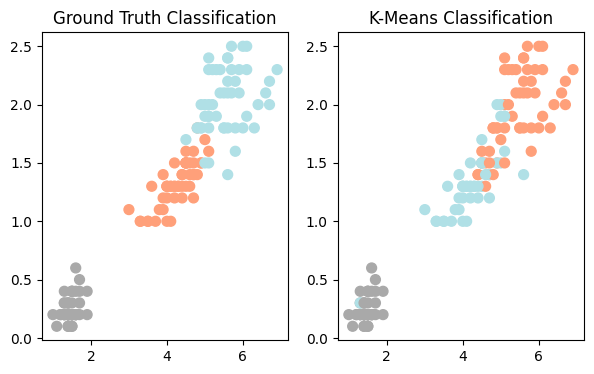

In [31]:
color_theme= np.array(['darkgray', 'lightsalmon', 'powderblue'])
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Fetal_Width, c=color_theme[iris.target], s=50) 
plt.title('Ground Truth Classification')
plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Fetal_Width, c=color_theme [clustering.labels_], s=50) 
plt.title('K-Means Classification')

Text(0.5, 1.0, 'K-Means Classification')

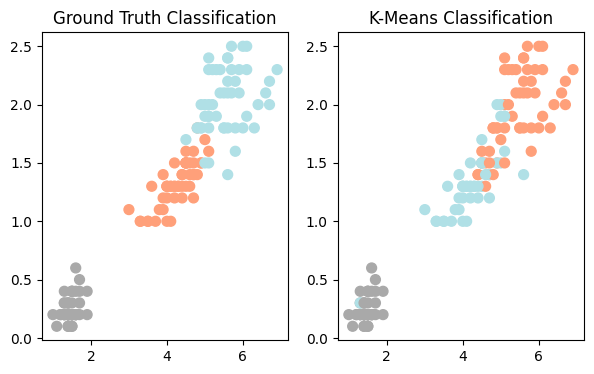

In [36]:
relabel=np.choose (clustering.labels_, [2,0,1]).astype (np.int64)
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Fetal_Width, c=color_theme[iris.target], s=50) 
plt.title('Ground Truth Classification')
plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Fetal_Width, c=color_theme [clustering.labels_], s=50) 
plt.title('K-Means Classification')

In [37]:
print (classification_report (y, relabel))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.80      0.74      0.77        50
           2       0.00      0.00      0.00        50

    accuracy                           0.25       150
   macro avg       0.27      0.25      0.26       150
weighted avg       0.27      0.25      0.26       150

